In [1]:
import CMGDB

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import numpy as np
import time
import math
import csv

import RoA
import CMGDB_util

### Let's compute the global dynamics of a map with 1 attractor, 2 saddles and 1 repeller.

In [91]:
# Define map f
def g(x):
    return [x[0] / (2.0 - x[0]), x[1] / (2.0 - x[1])]

def f(x):
    return g(g(x))
    

In [92]:
# Define box map for f
def F(rect):
    return CMGDB.BoxMap(f, rect)

In [93]:
# Define de parameters for this map
sb = 6
subdiv_init = subdiv_min = subdiv_max = sb  # uniform grid
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

phase_periodic = [False, False]  # periodic boundaries

0:00:00.002404


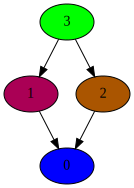

In [94]:
MG_util = CMGDB_util.CMGDB_util()

# base name for the output files
base_name = "4_critical_points" + str(subdiv_init) 

morse_graph, map_graph = MG_util.run_CMGDB(
    subdiv_min, subdiv_max, lower_bounds, upper_bounds, phase_periodic, F, base_name, subdiv_init, cmap=matplotlib.cm.cool)

#, cmap=newcmp)

CMGDB.PlotMorseGraph(morse_graph)

dictionary with volume of all Morse tiles = {0: 0.75, 1: 0.09375, 2: 0.09375}


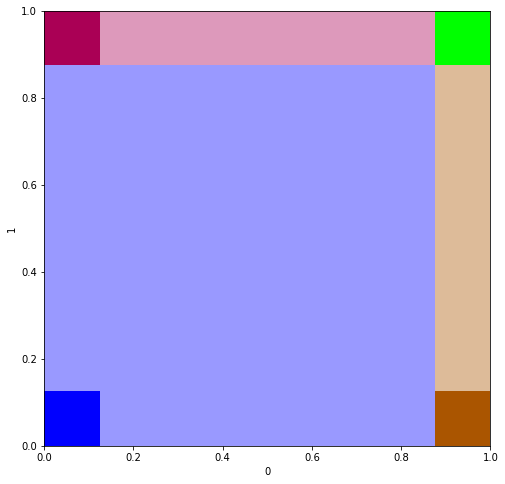

In [95]:
roa = RoA.RoA(map_graph, morse_graph)

fig, ax = roa.PlotTiles()

plt.show()

### Let's compute the global dynamics of a the Leslie map.

In [101]:
# Define Leslie map
def f(x):
    th1 = 19.6
    th2 = 23.68
    return [(th1 * x[0] + th2 * x[1]) * math.exp (-0.1 * (x[0] + x[1])), 0.7 * x[0]]

# Define box map for f
def F(rect):
    return CMGDB.BoxMap(f, rect)

In [108]:
# Define de parameters for this map
sb = 13
subdiv_init = subdiv_min = subdiv_max = sb  # uniform grid
lower_bounds = [-0.001, -0.001]
upper_bounds = [90.0, 70.0]

phase_periodic = [False, False]  # periodic boundaries

0:00:00.224302


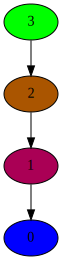

In [109]:
MG_util = CMGDB_util.CMGDB_util()

# base name for the output files
base_name = "Leslie_map_" + str(subdiv_init) 

morse_graph, map_graph = MG_util.run_CMGDB(
    subdiv_min, subdiv_max, lower_bounds, upper_bounds, phase_periodic, F, base_name, subdiv_init, cmap=matplotlib.cm.cool)

#, cmap=newcmp)

CMGDB.PlotMorseGraph(morse_graph)

dictionary with volume of all Morse tiles = {0: 1899.5843753015952, 2: 3361.5721880333526, 1: 82.28968751306157}


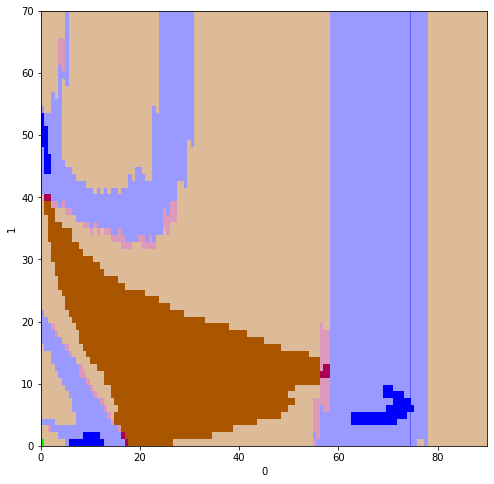

In [110]:
roa = RoA.RoA(map_graph, morse_graph)

fig, ax = roa.PlotTiles()